In [1]:
import pandas as pd # 导入pandas
facescore = pd.read_csv("../data/FaceScore.csv") # 读取颜值评分的数据
print(facescore.shape) # 输出数据的行列数，判断数据是否完整
facescore[0:10] # 观察数据格式

(5500, 2)


,Filename,Rating
0,ftw1.jpg,4.083333
1,ftw10.jpg,3.666667
2,ftw100.jpg,1.916667
3,ftw101.jpg,2.416667
4,ftw102.jpg,3.166667
5,ftw103.jpg,2.416667
6,ftw104.jpg,2.666667
7,ftw105.jpg,2.666667
8,ftw106.jpg,3.083333
9,ftw107.jpg,3.750000


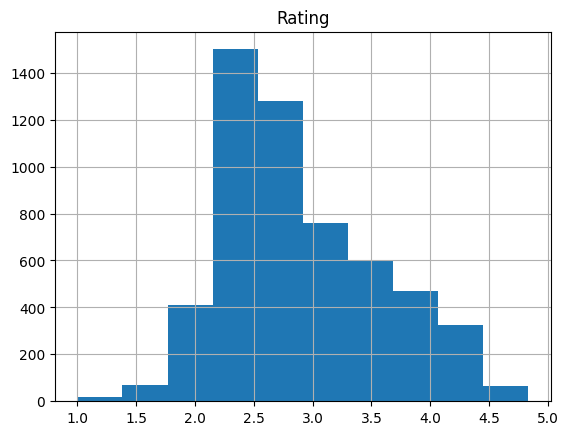

In [2]:
facescore.hist(); # 通过绘制直方图观察颜值评分的分布，输入分号只显示图

In [3]:
import numpy as np # 导入numpy
# 分离X和Y，将Y转换成数组
picture_name = facescore["Filename"] # 提取Filename列
N = len(picture_name) # 获得样本量
y = np.array(facescore["Rating"]).reshape(N, 1) # 提取Y，转换成二维数组

y # 查看Y

array([[4.08333333],
       [3.66666667],
       [1.91666667],
       ...,
       [2.36363636],
       [2.36363636],
       [2.27272727]])

In [4]:
# 准备图片数据
from PIL import Image # 导入Image
size = 128 # 图片尺寸

x = np.zeros([N, size, size, 3]) # 初始化X为零，可以存储N个大小size*size、通道是3的图片矩阵

# 读取图片数据
for i in range(N):
    name = picture_name[i] # 第i张图片的名称
    image = Image.open("../data/images/" + name) # 按照文件名读取图片
    image = image.resize([size, size]) # 更改图片大小
    image = np.array(image)/255 # 控制数据范围，不让图片显示为白色（imshow默认数据范围为0-1），并将图片数据转换成二维数组
    x[i, ] = image # 存入x中

In [7]:
# 绘制前15张图片
import matplotlib.pyplot as plt # 导入绘图模块

plt.figure() # 绘制画布
fig, ax = plt.subplot(3, 5) # 排列为3×5
fig.set_figheight(9.5) # 设置高度
fig.set_figwidth(15) # 设置宽度

ax = ax.flatten() # 降维函数，使得能使用ax[i]，不必使用ax[i, j]

for i in range(15):
    ax[i].imshow(x[i, :, :, :]) # 绘制第i张图片
    ax[i].set_title(np.round(y[i], 2)) # 设置标题为得分，并保留两位小数

TypeError: subplot() takes 1 or 3 positional arguments but 2 were given

<Figure size 640x480 with 0 Axes>

In [8]:
# 切分数据集
from sklearn.model_selection import train_test_split # 导入划分数据集模块
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 123) # 切分训练集和测试集，70%训练集

In [9]:
from keras.layers import Input, Flatten, Dense
# 导入输入层和全连接层模块，通过Flatten在全连接层之前将多维数组压缩成一维数组
from keras import Model # 导入Model模块
input_layers = Input([size, size, 3]) # 设置张量维度，输出时为[None, size, size, 3]，None是batch size
a = input_layers # 通过a得到输出层
a = Flatten()(a) # 拉直a，从而传入全连接层
a = Dense(256)(a)
a = Dense(256)(a)
a = Dense(1)(a) # 输出维度1
output_layers = a # 输出层

# 构建模型
model = Model(input_layers, output_layers)
model.summary() # 输出模型描述

Metal device set to: Apple M1 Pro

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 flatten (Flatten)           (None, 49152)             0         
                                                                 
 dense (Dense)               (None, 1)                 49153     
                                                                 
Total params: 49,153
Trainable params: 49,153
Non-trainable params: 0
_________________________________________________________________


2022-10-14 17:17:38.911882: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-14 17:17:38.912176: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


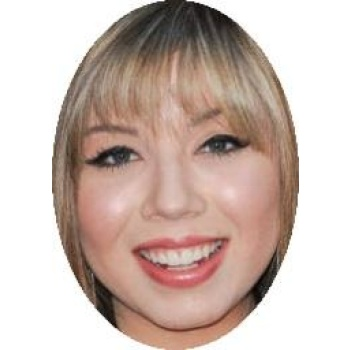

In [11]:
# 与已知结果进行对比
test01 = Image.open("../data/images/" + picture_name[76])
test01

In [13]:
model.compile(loss='mse', metrics=['mse', 'mae'])

In [14]:
model.fit(x=x_train, y=y_train, batch_size=32, epochs=10)

Epoch 1/10
  1/121 [..............................] - ETA: 41s - loss: 9.3661 - mse: 9.3661 - mae: 2.9700

2022-10-14 17:21:03.127409: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


121/121 [==============================] - 1s 6ms/step - loss: 272.4685 - mse: 272.4685 - mae: 12.5979
Epoch 2/10
121/121 [==============================] - 1s 6ms/step - loss: 230.1987 - mse: 230.1987 - mae: 14.7590
Epoch 3/10
121/121 [==============================] - 1s 6ms/step - loss: 233.0691 - mse: 233.0691 - mae: 14.5741
Epoch 4/10
121/121 [==============================] - 1s 5ms/step - loss: 236.5596 - mse: 236.5596 - mae: 14.8996
Epoch 5/10
121/121 [==============================] - 1s 6ms/step - loss: 234.5508 - mse: 234.5508 - mae: 14.7709
Epoch 6/10
121/121 [==============================] - 1s 6ms/step - loss: 229.0487 - mse: 229.0487 - mae: 14.5006
Epoch 7/10
121/121 [==============================] - 1s 6ms/step - loss: 232.9325 - mse: 232.9325 - mae: 14.8802
Epoch 8/10
121/121 [==============================] - 1s 6ms/step - loss: 236.0585 - mse: 236.0585 - mae: 15.1256
Epoch 9/10
121/121 [==============================] - 1s 6ms/step - loss: 231.0066 - mse: 231.0066 

In [12]:
# 处理图片
image01 = test01
image01 = image01.resize([size, size]) # 重新设置图片尺寸
image01 = np.array(image01)/255 # 改变数据范围
image01 = image01.reshape((1, size, size, 3)) # 改变数组形状，使得能够输入模型
print("原始评分：", y[77], "预测得分：", model.predict(image01))

1/1 [==============================] - 0s 182ms/step
原始评分： [2.5] 预测得分： [[-0.7008966]]


2022-10-14 17:18:00.721210: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-14 17:18:00.768360: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [ ]:
# 为输入的图片打分
test02 = Image.open("颜值模型待打分图片.jpg")
test02

In [ ]:
# 处理图片
image02 = test02
image02 = image02.resize([size, size]) # 重新设置图片尺寸
image02 = np.array(image02)/255 # 改变数据范围
image02 = image02.reshape((1, size, size, 3)) # 改变数组形状，使得能够输入模型
print( "颜值评分结果：", model.predict(image02))